In [54]:
import pandas as pd
data = pd.read_csv ('~/Desktop/spam.csv')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
df = data.drop(data.columns[[2, 3, 4]], axis=1)
df.head() 

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='label', ylabel='count'>

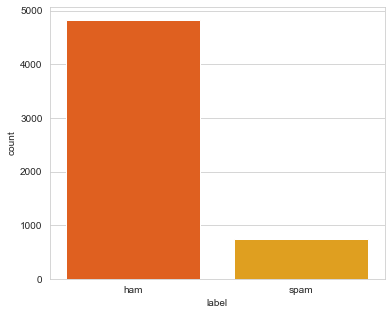

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
sns.set_style('whitegrid')
sns.countplot(x='label',data=df,palette="autumn")

In [58]:
df['length'] = df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [59]:
df.groupby('label').count()

,message,length
label,,
ham,4825,4825
spam,747,747


In [60]:
import re
# Replace email address with 'emailaddress'
df['msg_email'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
df.head()

,label,message,length,msg_email
0,ham,"Go until jurong point, crazy.. Available only ...",111,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
# remove punctuation
df['msg_Pun'] = df['msg_email'].str.replace(r'[^\w\d\s]', ' ')
df['msg_Pun']

0       Go until jurong point  crazy   Available only ...
1                           Ok lar    Joking wif u oni   
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor    U c already then say   
4       Nah I don t think he goes to usf  he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home 
5569    Pity    was in mood for that  So   any other s...
5570    The guy did some bitching but I acted like i d...
5571                           Rofl  Its true to its name
Name: msg_Pun, Length: 5572, dtype: object

In [62]:
# change words to lower case
df['msg_lower'] = df['msg_Pun'].str.lower()
df['msg_lower']

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: msg_lower, Length: 5572, dtype: object

In [63]:
#changing category to numeric
df['label'] = df['label'].astype('category')
df['label_New'] = df['label'].cat.codes
df.head()

,label,message,length,msg_email,msg_Pun,msg_lower,label_New
0,ham,"Go until jurong point, crazy.. Available only ...",111,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only ...,go until jurong point crazy available only ...,0
1,ham,Ok lar... Joking wif u oni...,29,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,u dun say so early hor u c already then say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives aro...,nah i don t think he goes to usf he lives aro...,0


In [64]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [65]:
#Removing Stop Words
stop_words = set(stopwords.words('english')) 
df['msg_stopword'] = df['msg_lower'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df['msg_stopword']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u å 750 pound prize...
5568                         ì_ b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: msg_stopword, Length: 5572, dtype: object

In [66]:
# Stemming
df['msg_stem'] = df['msg_stopword'].apply(lambda x: ' '.join(ps.stem(word) for word in x.split()))
df['msg_stem']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u å 750 pound prize 2...
5568                             ì_ b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: msg_stem, Length: 5572, dtype: object

In [67]:
sent = df['msg_stem']
from nltk.tokenize import word_tokenize

#bag-of-words model        
filtered_sentence = [] 
for w in sent:
    tokenize = word_tokenize(w)
    for word in tokenize:
        filtered_sentence.append(word)
print(filtered_sentence)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', '2005', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'å', '1', '50', 'rcv', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'å', '900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'cod

Number of words: 7238


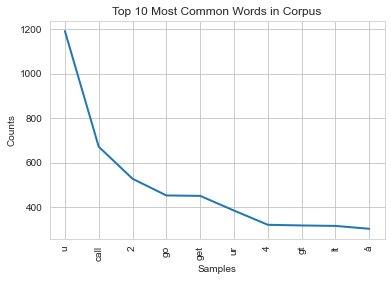

In [68]:
all_words = nltk.FreqDist(filtered_sentence)
print('Number of words: {}'.format(len(all_words)))
all_words.plot(10, title='Top 10 Most Common Words in Corpus');

# Using TF-IDF with Bayes Therom

In [69]:
#using TF-IDF
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidf_model = TfidfVectorizer()
X1 = tfidf_model.fit_transform(sent)
tfidf_data=pd.DataFrame(X1.toarray())
tfidf_data.head()

,0,1,2,3,4,5,6,7,8,9,...,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0.95695067264574


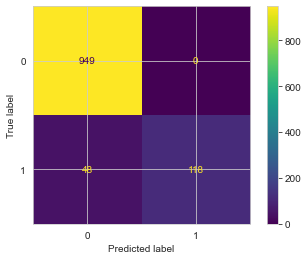

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       949
           1       1.00      0.71      0.83       166

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.90      1115
weighted avg       0.96      0.96      0.95      1115



In [70]:
X=tfidf_data
y=df['label_New']

#Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
bayesmodel1 = MultinomialNB().fit(X_train, y_train)
y_pred=bayesmodel1.predict(X_test)

#Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bayesmodel1, X_test, y_test)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                                  End

# Using TF-IDF with Logistic Regression

0.9524663677130045


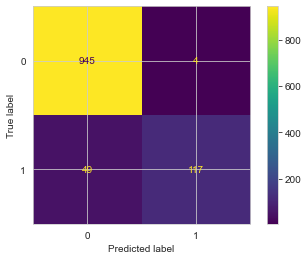

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       949
           1       0.97      0.70      0.82       166

    accuracy                           0.95      1115
   macro avg       0.96      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



In [71]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=tfidf_data
y=df['label_New']

#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Training model using Logistic Regression
Logimodel = LogisticRegression(solver='liblinear', penalty='l1')
Logimodel.fit(X_train, y_train)
y_pred=Logimodel.predict(X_test)

#Accuracy
from sklearn.metrics import accuracy_score
Logiscore = accuracy_score(y_test,y_pred)
print(Logiscore)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Logimodel, X_test, y_test)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                                 End

# Using count vectorizer with Bayes Therom


0.9865470852017937


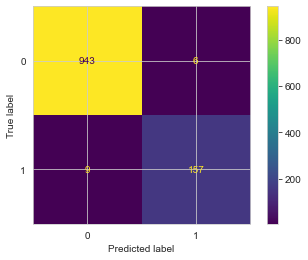

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(sent).toarray()
y=df['label_New']

#Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
bayesmodel2 = MultinomialNB().fit(X_train, y_train)
y_pred=bayesmodel2 .predict(X_test)


#Accuracy

from sklearn.metrics import accuracy_score
Naivescore = accuracy_score(y_test,y_pred)
print(Naivescore)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(bayesmodel2 , X_test, y_test)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                                    End

# Using count vectorizer with Logistic Regression


0.9757847533632287


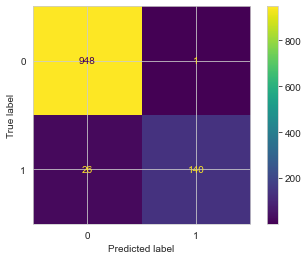

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       0.99      0.84      0.91       166

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(sent).toarray()
y=df['label_New']

#Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#Training Model with Logistic Regression
Logimodel2 = LogisticRegression(solver='liblinear', penalty='l1')
Logimodel2.fit(X_train, y_train)
y_pred = Logimodel2.predict(X_test)


#Accuracy
from sklearn.metrics import accuracy_score
Logiscore2 = accuracy_score(y_test,y_pred)
print(Logiscore2)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Logimodel2, X_test, y_test)
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                                 End